# Super-resolution of images using Deep Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import os
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, InterpolationMode, ToPILImage
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from IPython.display import Image

In [3]:
from super_image_resolution.utils import split, find_files
from super_image_resolution.datasets import CustomDataset

## Motivation 

<font size="4">
    
    - Quality of pictorial data is crucial for image analysis especially in medical imaging, satellite imaging, surveillance and security, etc
    <br>
    - Acquisition of high-quality imagerial data is often expensive, time-consuming and bounded by limitation of hardware
    <br>
    - Single Image Super-Resolution can be leveraged to computationally improve quality of images from low-quality counter-parts

## Objective

<font size="4">
    
    Increasing resolution of Digital Histopathological Images using Super-Resolution Patch Conditional GANs (SR-PCGANs)

## Dataset
<font size="4">
    Post-NAT-BRCA Residual Breast Cancer Cellularity after Neoadjuvant Chemotherapy using Digital Pathology
    <br>
    &emsp; - Contains 69 Whole Slide Images (WSI) stored in <b>SVS</b> format
    <br>
    &emsp; - Average size of WSI of 500 MB
    <br>
    &emsp; - Average dimension of WSI 40K * 40K 

In [6]:
SEED = 40
SPLIT_RATIO = [.8, .15, .05]
train_wsi, val_wsi, test_wsi = split(
    path="/scratch/mittal.nit/Post-NAT-BRCA/samples256x256_v2/", 
    ratios=SPLIT_RATIO, 
    seed=SEED)
print(f"Number of WSI in train: {len(train_wsi)}, val: {len(val_wsi)}, test: {len(test_wsi)}")

Number of WSI in train: 55, val: 10, test: 4


## Low-Risk Goal 

<font size="4">
    - Designing efficient and performant sampler to load Whole Slide Images (WSIs) and sample smaller patches because entire WSI cannot be loaded into GPU memory during training

In [20]:
Image(url= "https://grand-challenge-public-prod.s3.amazonaws.com/f/challenge/65/405442d8-dda7-4631-86e4-af25bb5a43c7/Picture1.png", width=400, height=400)

<font size="4"> Randomly sampled 200 patches each of size 256 * 256 from each WSI

In [7]:
train_patches = [patch for wsi in train_wsi for patch in find_files(wsi, ext="png")]
val_patches = [patch for wsi in val_wsi for patch in find_files(wsi, ext="png")]
test_patches = [patch for wsi in test_wsi for patch in find_files(wsi, ext="png")]
print(f"Number of patches in train: {len(train_patches)}, val: {len(val_patches)}, test: {len(test_patches)}")

Number of patches in train: 11000, val: 2000, test: 800


## Medium-Risk Goal 

<font size="4">
    - Training and testing end-2-end pixel-2-pixel super-resolution patch-conditional GANs (SR-PCGANs) to increase resolution of tissue patches

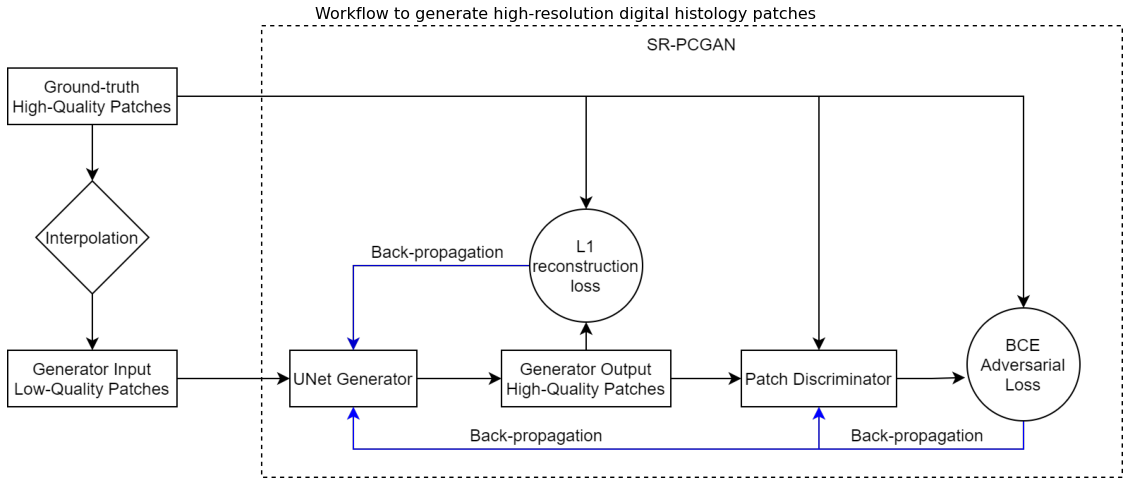

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(plt.imread('/home/mittal.nit/projects/super_image_resolution/assets/pcgan_wsi_patches_64to256/WorkFlow SR-PCGAN.png'))
ax.set_title("Workflow to generate high-resolution digital histology patches", fontdict={"fontsize": 16})
ax.set_axis_off()
plt.show()

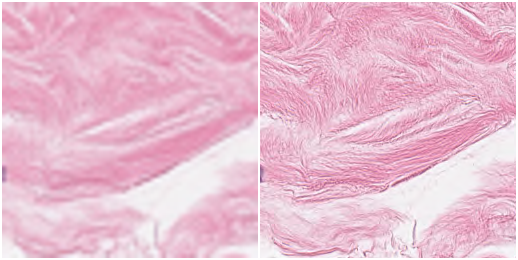

In [24]:
FROM_SIZE = 64
TO_SIZE = 256

in_transforms = Compose([
    Resize(size=FROM_SIZE, interpolation=InterpolationMode.BICUBIC),
    Resize(size=TO_SIZE, interpolation=InterpolationMode.BICUBIC), 
    ToTensor()
])

out_transforms = Compose([
    ToTensor()
])

train_dataset = CustomDataset(
    paths=train_patches,
    in_transforms=in_transforms,
    out_transforms=out_transforms)

train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

fps, X, Y = next(iter(train_loader))
ToPILImage()(make_grid(tensor=[X[0], Y[0]], pad_value=1.),)

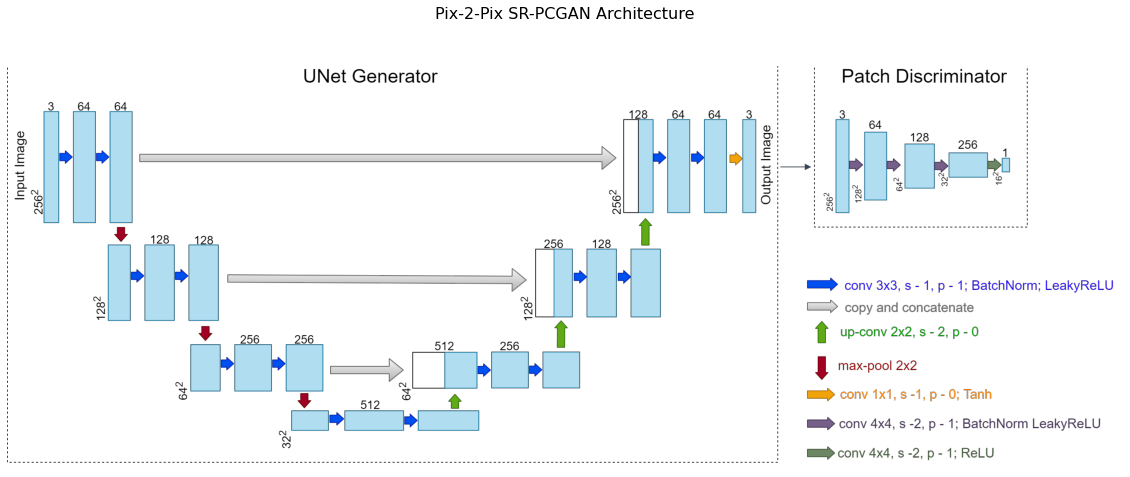

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(plt.imread('/home/mittal.nit/projects/super_image_resolution/assets/pcgan_wsi_patches_64to256/SR-PCGAN architecture.png'))
ax.set_title("Pix-2-Pix SR-PCGAN Architecture", fontdict={"fontsize": 16}, y=1.1)
ax.set_axis_off()
plt.show()